# Hyperparameter Optimization For Xgboost on Cancer-Genome Dataset

In [146]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from scipy.stats import randint
import pandas as pd

# Step 1: Read the dataset:
Train = pd.read_csv('Original_data/Test_Set.csv')
Test = pd.read_csv("Original_data/Test_Set.csv")
X_train = Train.iloc[:,0:-1]
X_test = Test.iloc[:,0:-1]
y_train = Train.iloc[:,-1]
le = LabelEncoder().fit(y = y_train)
y_train = le.transform(y_train)

y_test = Test.iloc[:,-1]

# Step 2: Define parameter grid for Hyperparameter optimization:
parameters={
 'n_estimators'     : [250, 500, 1000], #Amount of trees
 "learning_rate"    : [0.001, 0.01, 0.05, 0.15, 0.25, 0.35 ] , # How much do the model update its residuals learn from each trees miscalculation
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15], # What is the highest amount of nodes on a tree, goes high as there is a lot of parameters
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ], # Minimum loss reduction required to make a split.
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7] #How big a precentage of columns are sampled for each tree
}

# Step 3: Instantiate XGBoost Classifier
xgb = XGBClassifier(
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi: softmax',
 num_class = 5,
 scale_pos_weight=1,
 seed=27)

# Step 4: Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_distributions=parameters, n_iter=50, cv=5,scoring='jaccard_score', random_state=42)


In [151]:
# Step 5: Fit the model
xgb.fit(X_train, y_train)

c:\Users\lauri\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:10:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=5,
              num_parallel_tree=None, ...)

In [150]:
random_search.fit(X_train, y_train)



# Step 6: Evaluate the model
best_model = random_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)
print("Best Parameters:", random_search.best_params_)

ValueError: 'jaccard_score' is not a valid scoring value. Use sklearn.metrics.get_scorer_names() to get valid options.

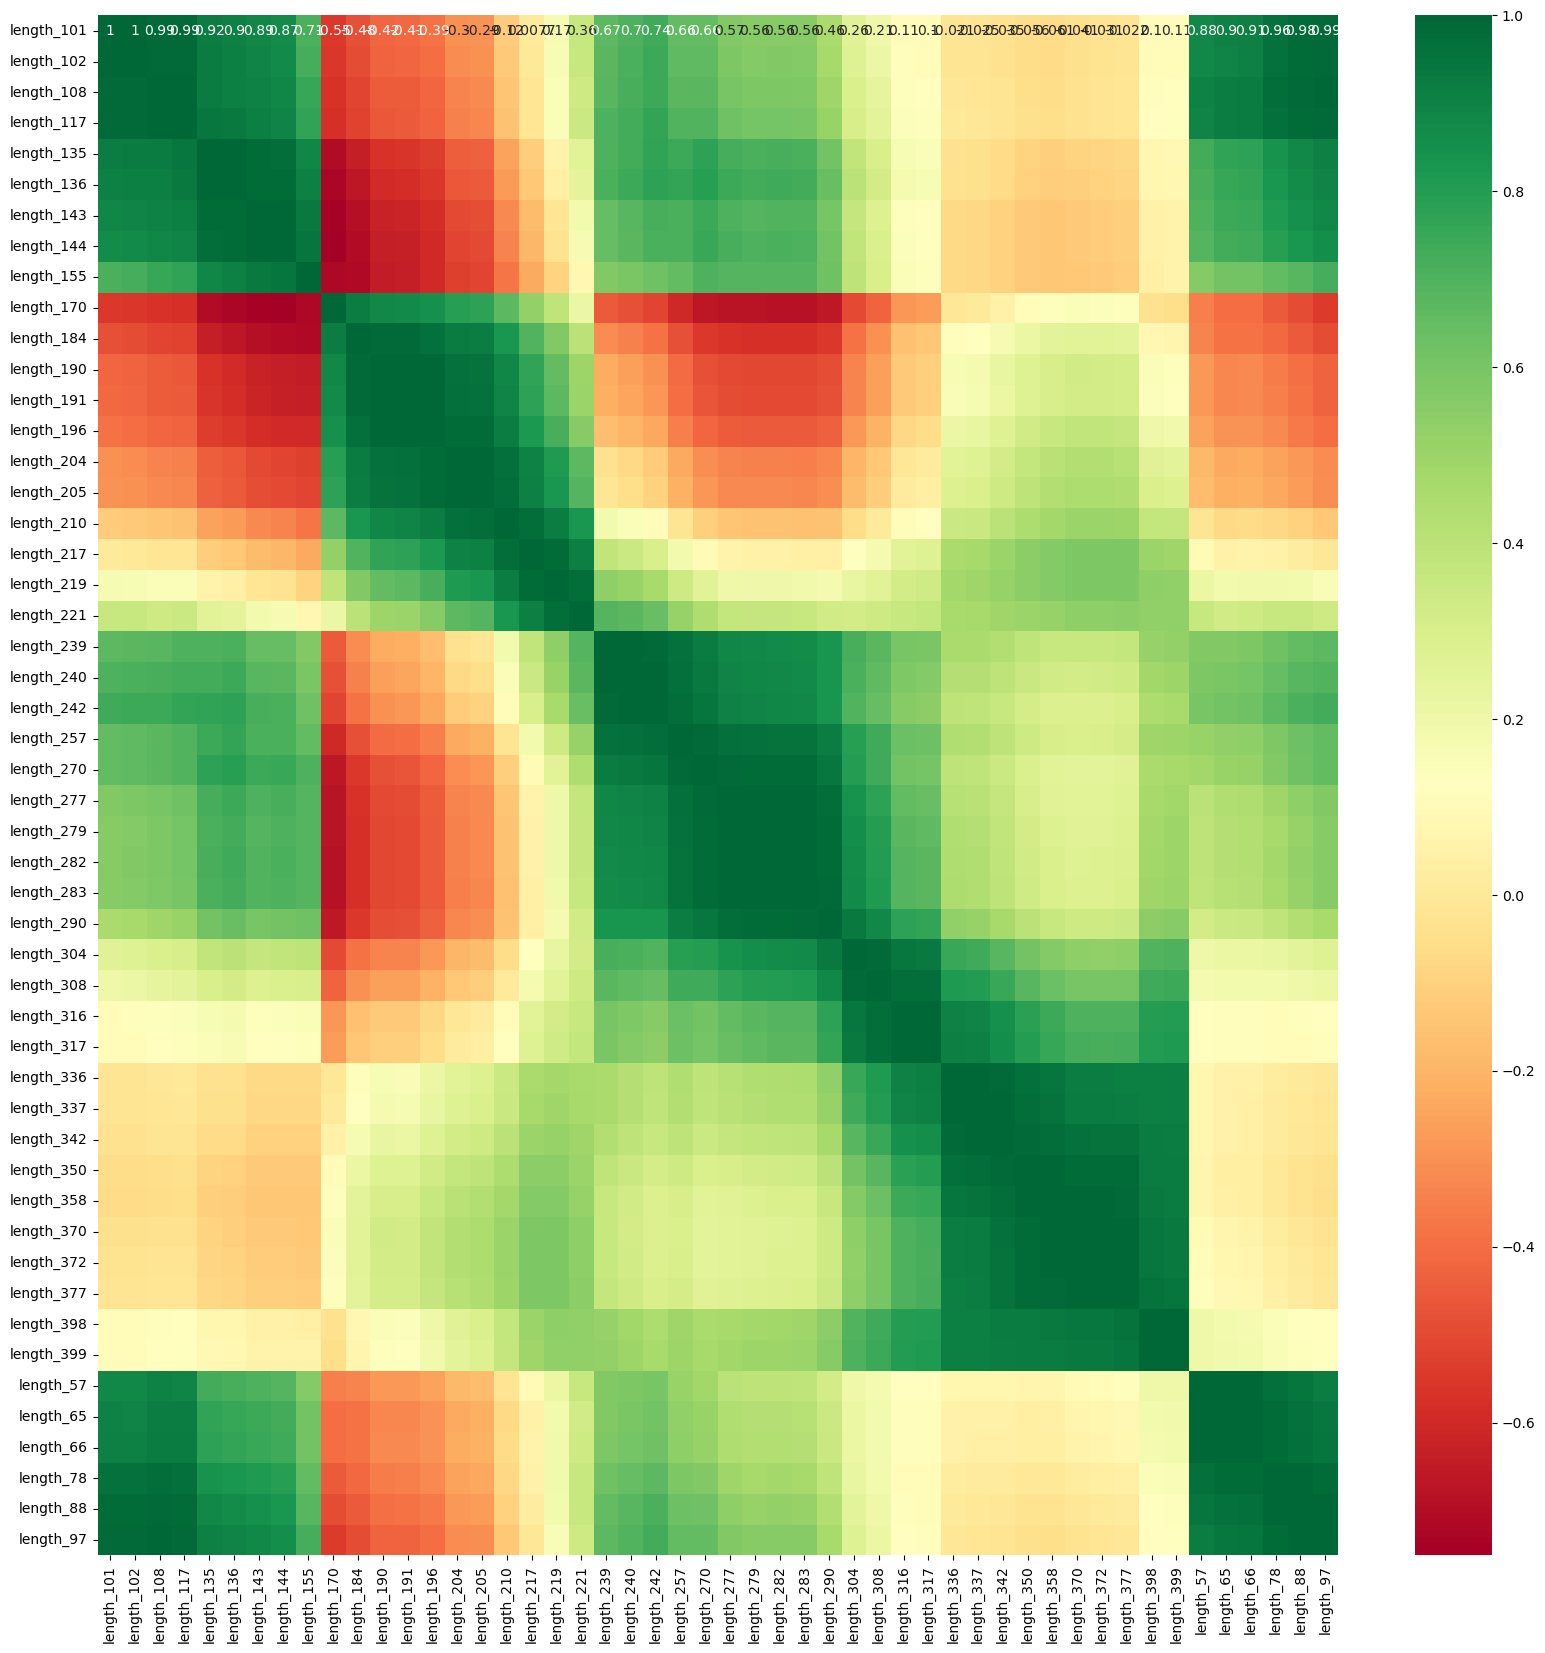

In [4]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = Train.iloc[:,:-1].sample(n=50, axis='columns')
corrmat = corrmat[sorted(corrmat.columns)]
corrmat = corrmat.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(Train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [60]:
from sklearn.model_selection import cross_val_score


#score=cross_val_score(xgboost,X,Y_mapped,cv=10)


AttributeError: module 'xgboost' has no attribute 'random_search'